In [ ]:
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

In [1]:
def read_numbers_from_file(file_name):
    with open(file_name, 'r') as file:
        numbers = file.read()[1:-1].split(",")
        numbers = [int(num) for num in numbers]
        return numbers

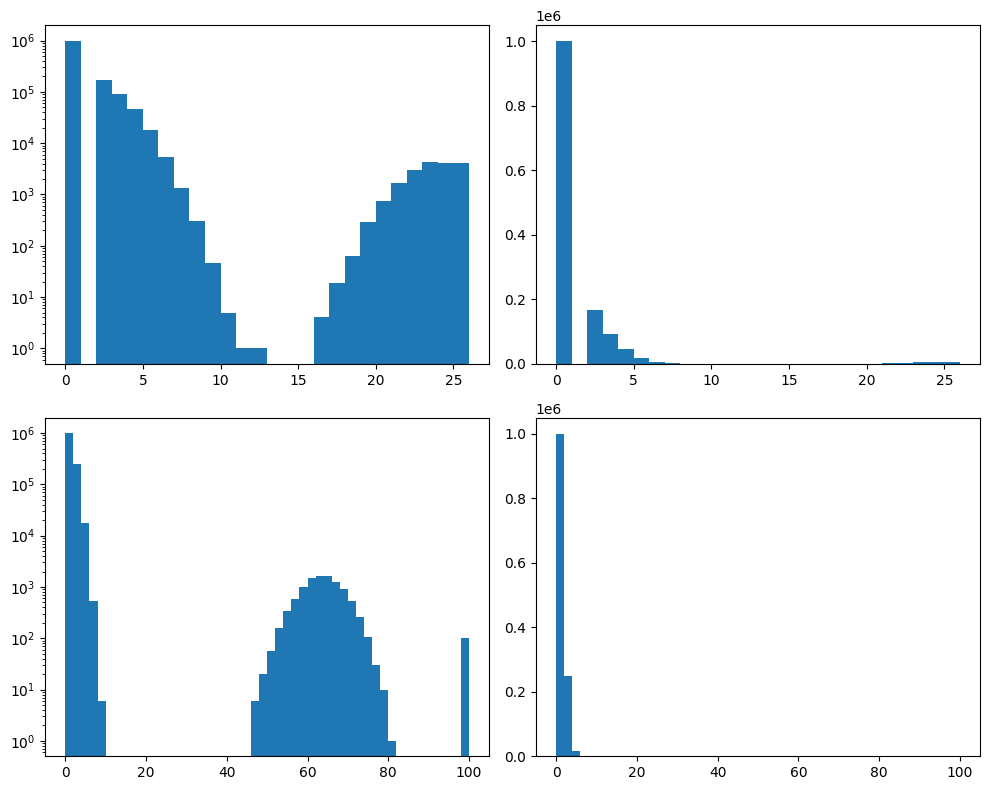

In [8]:
childs = read_numbers_from_file("stats.txt")
childs1000 = read_numbers_from_file("stats1000.txt")

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8), squeeze=False)

axes[0][0].hist(childs, log=True, bins = 26)
axes[0][1].hist(childs, log=False, bins = 26)
axes[1][0].hist(childs1000, log=True, bins = 50)
axes[1][1].hist(childs1000, log=False, bins = 50)

fig.tight_layout()
plt.show()

In [10]:
hash_x = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
hash_y = [30,75,142,236,282,346,426,476,530,610,721,817,969,1053,1244,1351,1304,1387,1512,1641]
tree_x = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
tree_y = [24,58,108,177,230,299,374,453,545,617,709,796,864,1020,1077,1257,1303,1438,1489,1692]
arr_x = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
arr_y = [6,14,24,37,51,70,88,107,127,154,203,223,239,247,309,304,304,346,369,397]

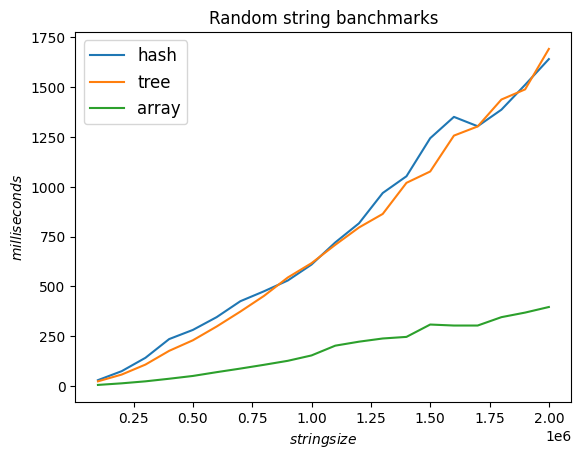

In [12]:
import matplotlib.pyplot as plt
plt.plot(hash_x, hash_y, label='hash')
plt.plot(tree_x, tree_y, label='tree')
plt.plot(arr_x, arr_y, label='array')
plt.xlabel(r'$string size$')
plt.ylabel(r'$milliseconds$')
plt.legend(loc='best', fontsize=12)
plt.title('Random string banchmarks')
plt.show()

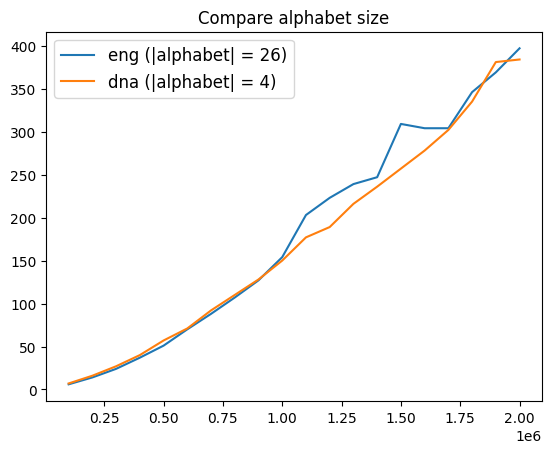

In [4]:
dna_arr_x = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
dna_arr_y = [7,16,27,40,57,71,92,110,128,150,177,189,216,236,257,278,302,335,381,384]

plt.plot(arr_x, arr_y, label='eng (|alphabet| = 26)')
plt.plot(dna_arr_x, dna_arr_y, label='dna (|alphabet| = 4)')
plt.legend(loc='best', fontsize=12)
plt.title('Compare alphabet size')
plt.show()

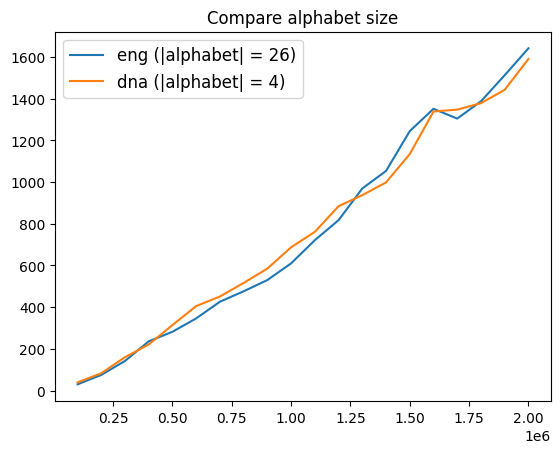

In [5]:
dna_hash_x = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1100000,1200000,1300000,1400000,1500000,1600000,1700000,1800000,1900000,2000000]
dna_hash_y = [39,83,160,221,314,405,451,516,585,687,761,884,937,998,1134,1338,1347,1378,1442,1590]

plt.plot(hash_x, hash_y, label='eng (|alphabet| = 26)')
plt.plot(dna_hash_x, dna_hash_y, label='dna (|alphabet| = 4)')
plt.legend(loc='best', fontsize=12)
plt.title('Compare alphabet size')
plt.show()